<a href="https://colab.research.google.com/github/SungjooHwang/SungjooHwang/blob/main/Ex11_2p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The origninal source of this example:**

**https://stackabuse.com/creating-a-neural-network-from-scratch-in-python/**

**The Problem**

Suppose we have some information about obesity, smoking habits, and exercise habits of five people. We also know whether these people are diabetic or not.
Here 1 refers to true and 0 refers to false. For instance, the first person has values of 0, 1, 0 which means that the person doesn't smoke, is obese, and doesn't exercise. The person is also diabetic.
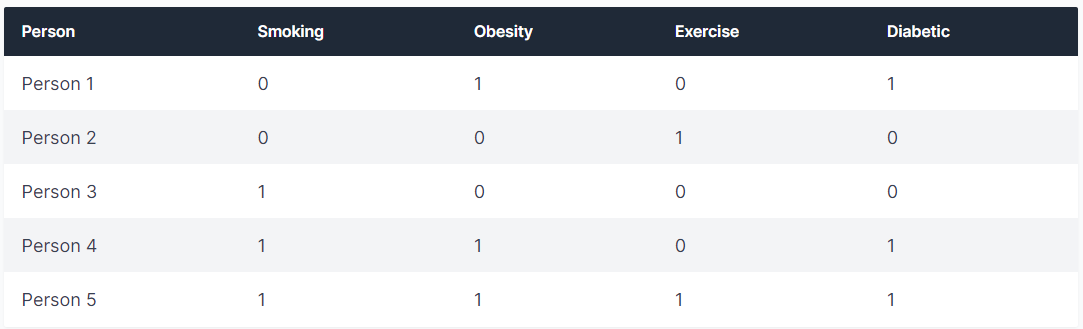

Create a neural network that is able to predict whether an unknown person is diabetic or not given data about his exercise habits, obesity, and smoking habits. This is a type of supervised learning problem (classification).


In [2]:
# First, creat our feature set and the corresponding labels for five records.

import numpy as np
feature_set = np.array([[0,1,0],[0,0,1],[1,0,0],[1,1,0],[1,1,1]])
labels = np.array([[1,0,0,1,1]])
labels = labels.reshape(5,1)

In [7]:
print(feature_set)
print(labels)

[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]]
[[1]
 [0]
 [0]
 [1]
 [1]]


**Creating a Neural Network**

We will create a very simple neural network with one input layer and one output layer. 
In our example our independent variables are smoking, obesity and exercise. The dependent variable is whether a person is diabetic or not.
In the beginning, the neural network makes some random predictions, these predictions are matched with the correct output and the error or the difference between the predicted values and the actual values is calculated. The function that finds the difference between the actual value and the propagated values is called the cost function. The cost here refers to the error. Our objective is to minimize the cost function. Training a neural network basically refers to minimizing the cost function. 


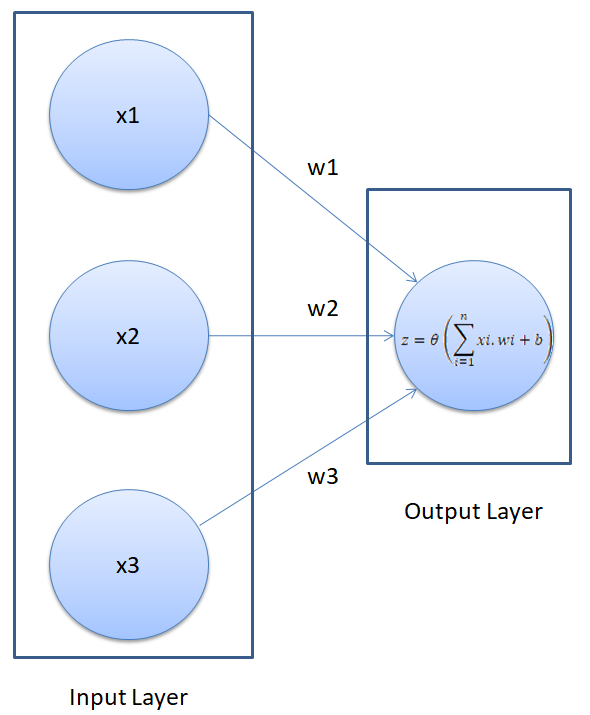

**Step 1: Feedforward**

In the feed-forward part of a neural network, predictions are made based on the values in the input nodes (e.g., x1, x2, x3) and the weights (e.g., w1, w2, w3). 
The weights of a neural network are basically what we have to adjust in order to be able to correctly predict our output. 



***(1) Calculate the dot product between inputs and weights***

The nodes in the input layer are connected with the output layer via three weight parameters. In the output layer, the values in the input nodes are multiplied with their corresponding weights and are added together. Finally, the bias term is added to the sum. The b in the above figure refers to the bias term.

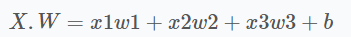





***(2) Pass the result from (1) through an activation function***

The result from Step 1 can be a set of any values. However, in our output we have the values in the form of 1 and 0. We want our output to be in the same format. To do so we need an activation function, which squashes input values between 1 and 0. One such activation function is the sigmoid function.
The sigmoid function returns 0.5 when the input is 0. It returns a value close to 1 if the input is a large positive number. In case of negative input, the sigmoid function outputs a value close to zero.

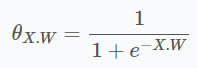

In [8]:
# Define hyper parameters for our neural network. We used the random.seed function so that we can get the same random values whenever the script is executed]

np.random.seed(42)
weights = np.random.rand(3,1)
bias = np.random.rand(1)
lr = 0.05

print(weights,bias)

[[0.37454012]
 [0.95071431]
 [0.73199394]] [0.59865848]


In [9]:
# Define our activation function. Our activation function is the sigmoid function

def sigmoid(x):
    return 1/(1+np.exp(-x))

# The method that calculates the derivative of the sigmoid function is "sigmoid(x) * sigmoid(1-x)"

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

**Step 2: Back Propagation**

In the beginning, before you do any training, the neural network makes random predictions which are far from correct.

The principle behind the working of a neural network is simple. We start by letting the network make random predictions about the output. We then compare the predicted output of the neural network with the actual output. Next, we fine-tune our weights and the bias in such a manner that our predicted output becomes closer to the actual output, which is basically known as "training the neural network".



***(1) Calculating the cost***

The first step in the back propagation section is to find the "cost" of the predictions. The cost of the prediction can simply be calculated by finding the difference between the predicted output and the actual output. The higher the difference, the higher the cost will be.

There are several other ways to find the cost, but we will use the mean squared error cost function. A cost function is simply the function that finds the cost of the given predictions.

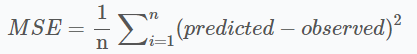


***(2) Minimizing the cost***

If your look at our neural network, you'll notice that we can only control the weights and the bias. Everything else is beyond our control. We cannot control the inputs, we cannot control the dot products, and we cannot manipulate the sigmoid function.

In order to minimize the cost, we need to find the weight and bias values for which the cost function returns the smallest value possible. The smaller the cost, the more correct our predictions are.

This is an optimization problem where we have to find the function minima.

To find the minima of a function, we can use the gradient decent algorithm. 

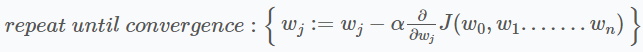

we can see there is an alpha symbol, which is multiplied by the gradient. This is called the learning rate. The learning rate defines how fast our algorithm learns.
We need to repeat the execution of the above equation for all the weights and bias until the cost is minimized to the desirable level. In other words, we need to keep executing the above equation until we get such values for bias and weights, for which the cost function returns a value close to zero.

We need to differentiate the cost function with respect to each weight. We will use the chain rule of differentiation for this purpose. Let's suppose "d_cost" is the derivate of our cost function with respect to weight "w", we can use chain rule to find this derivative.

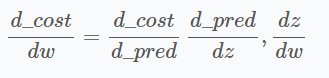

Here, "d_cost/d_pred" is "2(predicted-observed)" (here, 2 can be ignored).

*(in the code "dcost_dpred = error")*

Here, "d_pred/d_z" is simply the sigmoid function and we have differentiated it with respect to input dot product "z".

*(in the code "dpred_dz = sigmoid_der(z)")*

Finally, caculate ***"d_z/dw". z = x1w1 + x2w2 +x3w3 + b. Derivative with respect to any weight is simply the corresponding input. ***
Hence, our final derivative of the cost function with respect to any weight, which is slope, is:
(in the code "slope = input x dcost_dpred x dpred_dz")

Here we have the "z_delta" variable, which contains the product of "dcost_dpred" and "dpred_dz". Instead of looping through each record and multiplying the input with corresponding z_delta, we take the transpose of the input feature matrix and multiply it with the z_delta. Finally, we multiply the learning rate variable lr with the derivative to increase the speed of convergence.

**YOUR TASK** *Change the # of iteration from 1 to 20000* 

In [19]:
## Train our neural network that will be able to predict whether a person is obese or not

# We define the number of epochs. An epoch is basically the number of times we want to train the algorithm on our data. 
# We will train the algorithm on our data 20,000 times. 
for epoch in range(1):   #for your better understanding
    inputs = feature_set
    print(inputs)

    # [feedforward step1]
    # Store the values from the feature_set to the input variable.
    # Find the dot product of the input and the weight vector and add bias to it. 
    XW = np.dot(feature_set, weights) + bias  # x1*w1 + x2*w2 + x3*w3 +b 
    print(XW)

    # [feedforward step2]
    # Pass the dot product through the sigmoid activation function
    z = sigmoid(XW)     # sigmoid(x1*w1 + x2*w2 + x3*w3 +b)
    print(z)


    # [backpropagation step 1]
    # The variable z contains the predicted outputs. The first step of the backpropagation is to find the error.
    error = z - labels    # (y_predict - y) 

    print(labels)
    print(error)
    print(error.sum())

    # [backpropagation step 2]
    # See above for the details (Chain rule)
    dcost_dpred = error    # (y_predict - y) 
    dpred_dz = sigmoid_der(z)   #   sigmoid(z)*(1-sigmoid(z))

    z_delta = dcost_dpred * dpred_dz     
   
    inputs = feature_set.T
    weights -= lr * np.dot(inputs, z_delta)

    for num in z_delta:
        bias -= lr * num

[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]]
[[ 6.41809749]
 [-5.30493084]
 [-4.9443238 ]
 [ 5.93709046]
 [ 5.09547637]]
[[0.9983709 ]
 [0.00494249]
 [0.00707334]
 [0.99736725]
 [0.99391289]]
[[1]
 [0]
 [0]
 [1]
 [1]]
[[-0.0016291 ]
 [ 0.00494249]
 [ 0.00707334]
 [-0.00263275]
 [-0.00608711]]
0.0016668764893801747


**Prediction**

You can now try and predict the value of a single instance. Let's suppose we have a record of a patient that comes in who smokes, is not obese, and doesn't exercise. Let's find if he is likely to be diabetic or not. The input feature will look like this: [1,0,0].

In [ ]:
single_point = np.array([1,0,0])
result = sigmoid(np.dot(single_point, weights) + bias)   # x1*w1 + x2*w2 + x3*w3 +b 
print(result)

[0.00175425]


You can see that the person is likely not diabetic since the value is much closer to 0 than 1.

Now let's test another person who doesn't, smoke, is obese, and doesn't exercises. The input feature vector will be [0,1,0].

In [ ]:
single_point = np.array([0,1,0])
result = sigmoid(np.dot(single_point, weights) + bias)  # # x1*w1 + x2*w2 + x3*w3 +b 
print(result)

[0.99962372]


You can see that the value is very close to 1, which is likely due to the person's obesity.